# Criando Nomes

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
print("Quantidade de nomes: "+ str(len(nomes_m) + len(nomes_f)))

Quantidade de nomes: 400


In [3]:
frames = [nomes_f, nomes_m]
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
168,IARA
157,CONCEICAO
78,WILSON
128,JOICE
79,VALDIR


# Incluindo ID dos alunos

In [4]:
import numpy as np
np.random.seed(123)

In [5]:
total_alunos = len(nomes)
total_alunos

400

In [6]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [7]:
dominios = ['@dominiodoemail.com.br','@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [8]:
nomes.sample(5)

,nome,id_aluno,dominio
46,FABIANA,358,@servicodoemail.com
38,DIEGO,294,@dominiodoemail.com.br
136,NILTON,271,@dominiodoemail.com.br
119,MOISES,4,@servicodoemail.com
101,GISELE,298,@servicodoemail.com


In [9]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [10]:
nomes.sample(5)

,nome,id_aluno,dominio,email
42,MARLENE,268,@servicodoemail.com,marlene@servicodoemail.com
76,TATIANE,203,@servicodoemail.com,tatiane@servicodoemail.com
65,MAURICIO,395,@servicodoemail.com,mauricio@servicodoemail.com
52,SAMUEL,220,@dominiodoemail.com.br,samuel@dominiodoemail.com.br
187,ELTON,97,@dominiodoemail.com.br,elton@dominiodoemail.com.br


# Criando a tabela Cursos

In [11]:
import html5lib
import lxml

In [12]:
url = 'https://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [13]:
type(cursos)
cursos = cursos[0]
type(cursos)

pandas.core.frame.DataFrame

In [14]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [15]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [16]:
cursos['id'] = cursos.index + 1
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [17]:
cursos = cursos.set_index('id')
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [18]:
#Assim retorna matricula valor 0
#nomes['matriculas'] = np.random.exponential(size=total_alunos).astype(int)
#nomes.sample(5)

#Nenhuma matricula será 0, porque arredonda para cima
#nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)).astype(int)
#nomes.sample(5)

#Aumenta a quantidade de matriculas
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
194,CLARA,277,@servicodoemail.com,clara@servicodoemail.com,3
64,ROBSON,290,@servicodoemail.com,robson@servicodoemail.com,2
13,DANIEL,195,@servicodoemail.com,daniel@servicodoemail.com,4
98,GILSON,134,@dominiodoemail.com.br,gilson@dominiodoemail.com.br,1
33,NATALIA,192,@dominiodoemail.com.br,natalia@dominiodoemail.com.br,1


In [19]:
nomes.matriculas.describe()

count    400.000000
mean       2.017500
std        1.422058
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [20]:
import seaborn as sns

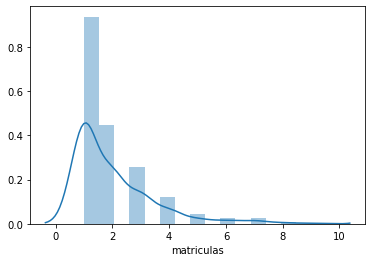

In [21]:
sns.distplot(nomes.matriculas)

In [22]:
nomes.matriculas.value_counts()

1    200
2     95
3     55
4     26
5      9
7      6
6      6
8      2
9      1
Name: matriculas, dtype: int64

In [23]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
23,FERNANDO,321,@dominiodoemail.com.br,fernando@dominiodoemail.com.br,2
169,JOELMA,394,@dominiodoemail.com.br,joelma@dominiodoemail.com.br,1
148,APARECIDO,332,@dominiodoemail.com.br,aparecido@dominiodoemail.com.br,3
24,CLAUDIA,16,@dominiodoemail.com.br,claudia@dominiodoemail.com.br,4
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br,1


# Selecionando cursos

In [24]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [25]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [26]:
matriculas

,id_aluno,id_curso
0,235,7
1,43,18
2,43,7
3,304,18
4,156,17
...,...,...
802,383,16
803,383,6
804,366,20
805,366,13


In [27]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_alunos'})

In [28]:
nomes.head(5)

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,2
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com,1
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,3


In [29]:
cursos.head(5)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [30]:
matriculas.head(5)

,id_aluno,id_curso
0,235,7
1,43,18
2,43,7
3,304,18
4,156,17


In [31]:
matriculas_por_curso.head(5)

,quantidade_alunos,nome_do_curso
id_curso,,
1,3,Lógica de programação
2,8,Java para Web
3,22,C# para Web
4,22,Ruby on Rails
5,19,Cursos de Python


# Saída em diferentes formatos

In [32]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [33]:
matriculas_json = matriculas_por_curso.to_json()

In [34]:
matriculas_json

'{"quantidade_alunos":{"1":3,"2":8,"3":22,"4":22,"5":19,"6":65,"7":62,"8":47,"9":48,"10":22,"11":18,"12":46,"13":89,"14":78,"15":61,"16":65,"17":8,"18":88,"19":14,"20":22},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [35]:
matriculas_html = matriculas_por_curso.to_html()
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>3</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>8</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>22</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>22</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>19</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>65</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>62</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>47</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>48</td>
     

In [36]:
from sqlalchemy import create_engine, MetaData, Table

In [37]:
engine = create_engine('sqlite:///:memory:')

In [38]:
engine

Engine(sqlite:///:memory:)

In [39]:
matriculas_por_curso.to_sql('matriculas', engine)

In [40]:
print(engine.table_names())

['matriculas']


# Buscando do banco sql

In [41]:
query = 'select * from matriculas where quantidade_alunos < 20'
pd.read_sql(query, engine)

,id_curso,quantidade_alunos,nome_do_curso
0,1,3,Lógica de programação
1,2,8,Java para Web
2,5,19,Cursos de Python
3,11,18,Preparatório para certificação Java
4,17,8,Internet das coisas
5,19,14,Boas práticas em Java


In [42]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_alunos'])
muitas_matriculas

,nome_do_curso,quantidade_alunos
0,Lógica de programação,3
1,Java para Web,8
2,C# para Web,22
3,Ruby on Rails,22
4,Cursos de Python,19
5,PHP com MySql,65
6,.NET para web,62
7,Novas integrações com Java,47
8,TDD com Java,48
9,Código limpo com C#,22


In [43]:
muitas_matriculas = muitas_matriculas.query('quantidade_alunos > 70')
muitas_matriculas

,nome_do_curso,quantidade_alunos
12,Persistência com .NET,89
13,Desenvolvendo jogos,78
17,Programação funcional,88


# Escrevendo no banco


In [44]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [45]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos alunos e alunas da próxima turma

In [46]:
matriculas_por_curso

,quantidade_alunos,nome_do_curso
id_curso,,
1,3,Lógica de programação
2,8,Java para Web
3,22,C# para Web
4,22,Ruby on Rails
5,19,Cursos de Python
6,65,PHP com MySql
7,62,.NET para web
8,47,Novas integrações com Java
9,48,TDD com Java


In [47]:
matriculas

,id_aluno,id_curso
0,235,7
1,43,18
2,43,7
3,304,18
4,156,17
...,...,...
802,383,16
803,383,6
804,366,20
805,366,13


In [48]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
6,343,16
12,288,16
36,191,16
37,191,16
49,80,16
...,...,...
734,349,16
781,127,16
783,114,16
793,58,16


In [53]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
4,16,MOISES,@servicodoemail.com,moises@servicodoemail.com,1
6,16,CINTIA,@servicodoemail.com,cintia@servicodoemail.com,2
8,16,IRACI,@servicodoemail.com,iraci@servicodoemail.com,4
31,16,VILMA,@servicodoemail.com,vilma@servicodoemail.com,1
36,16,KARINA,@servicodoemail.com,karina@servicodoemail.com,3
...,...,...,...,...,...
349,16,DAMIAO,@dominiodoemail.com.br,damiao@dominiodoemail.com.br,6
353,16,JENIFER,@servicodoemail.com,jenifer@servicodoemail.com,3
376,16,AUGUSTO,@servicodoemail.com,augusto@servicodoemail.com,3


In [55]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
4       MOISES
6       CINTIA
8        IRACI
31       VILMA
36      KARINA
        ...   
349     DAMIAO
353    JENIFER
376    AUGUSTO
383     ALVARO
392     NELSON
Name: nome, Length: 65, dtype: object

In [56]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
4,MOISES
6,CINTIA
8,IRACI
31,VILMA
36,KARINA
...,...
349,DAMIAO
353,JENIFER
376,AUGUSTO


In [61]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [59]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [60]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [63]:
proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

,Alunos do curso de Estatística básica
id_aluno,
4,MOISES
6,CINTIA
8,IRACI
31,VILMA
36,KARINA
...,...
349,DAMIAO
353,JENIFER
376,AUGUSTO


In [64]:
proxima_turma.sample()

,nome
id_aluno,
6,CINTIA


# Excel

In [65]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)